In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from scipy import integrate 
from scipy.stats import norm

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "Times New Roman",
    "font.monospace": 'Computer Modern'
    ,"font.size": 18.5
    ,"axes.labelsize":22.5
})

In [3]:
def D(x,y,t,mu):
    return mu/2*(np.exp(-mu*(x+y-2*t))+np.exp(-mu*(abs(x-y))))

In [5]:
t = 0
mu =0.0566# 0.54587
x_vals = np.arange(1+t,10+t,1/52)
y_vals = np.arange(1+t,10+t,1/52)
z_vals = np.matrix([[D(x_vals[i],y_vals[j],t,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])

<IPython.core.display.Javascript object>


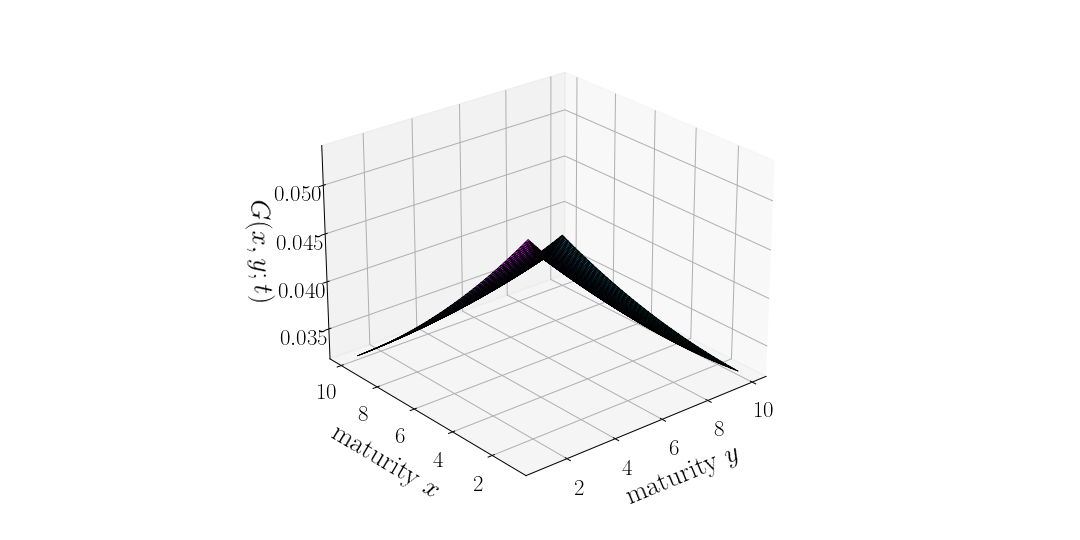

In [6]:
fig = plt.figure(figsize=(12,6))

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$', labelpad=10)
ax.set_ylabel('maturity $x$', labelpad=10)
ax.set_zlabel(r'$G(x,y;t)$', labelpad=10)
#ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z,rstride=10, cstride=10, cmap=cm.cool, 
                       #Linewidth=0.1,
                       edgecolors='k', lw=0.6)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

ax.view_init(25,230)

#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig('PropagatorVisualization', bbox_inches='tight', pad_inches=0.01, dpi=400)    
plt.show()
plt.close(fig)


In [7]:
def D_TFR(x,y,t,T_FR,mu):
    return mu*(math.cosh(mu*(T_FR-abs(x-y)))+math.cosh(mu*(T_FR-(x+y-2*t))))/(2*math.sinh(mu*T_FR))

In [8]:
T_FR = 50
z_vals_T_FR = np.matrix([[D_TFR(x_vals[i],y_vals[j],t,T_FR,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])

<IPython.core.display.Javascript object>


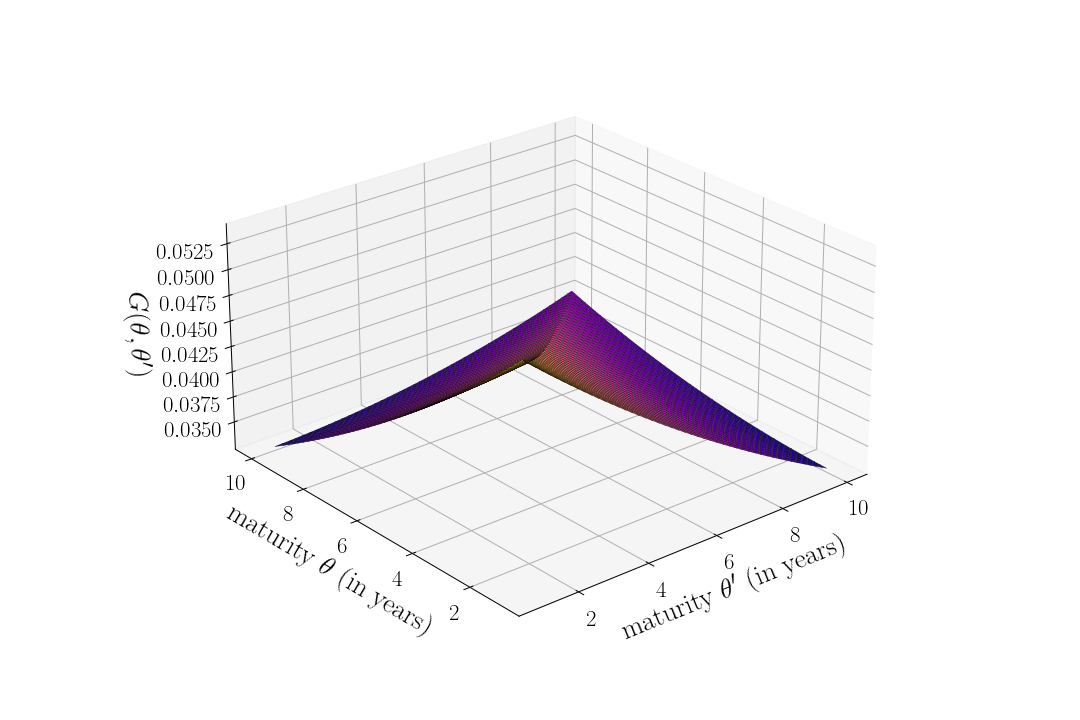

In [9]:
fig = plt.figure(figsize=(12,8))

#fig.set_size_inches(25, 10)


ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_T_FR

X,Y=np.meshgrid(x,y)


ax.set_xlabel(r"maturity $\theta'$ (in years)", labelpad=10)
ax.set_ylabel(r"maturity $\theta$ (in years)", labelpad=10)
ax.set_zlabel(r"$G(\theta,\theta')$", labelpad=20)
#ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z,rstride=10, cstride=10, cmap="plasma", 
                       linewidth=0.1, edgecolors='k', lw=0.2)

# Adjust tick labels
#ax.set_xticks(np.arange(min(x), max(x)+1, 2))  # Specify x-axis tick positions
#ax.set_yticks(np.arange(min(y), max(y)+1, 2))  # Specify y-axis tick positions

#z_ticks = np.arange(np.min(z), np.max(z) + 1, 2)  # Specify z-axis tick positions
#ax.set_zticks(z_ticks)

ax.tick_params(axis='z', pad=10)  # Adjust the spacing between the z-axis and tick labels

ax.set_box_aspect([2, 2, 1.1])  # Adjust the aspect ratio to make the plot wider
#ax.dist = 12  # Adjust the distance of the plot from the viewer

plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

ax.view_init(25,230)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Propagator_T_FR_Visualization', dpi=400) 
plt.show()
plt.close(fig)

Note that both of the propagators above do not imply a correlation of 1 for equal maturities, i.e. $D(x,x;t,T_FR)\neq1$. Therefore, the field $\mathcal{A}(t,x)$ must be rescaled (in such a way that the theory remains invariant)

In [10]:
def D_norm(x,y,t,mu):
    normalisation_factor = (mu/2*(np.exp(-2*mu*(x-t))+1))**(-1/2)*(mu/2*(np.exp(-2*mu*(y-t))+1))**(-1/2)
    return mu/2*(np.exp(-mu*(x+y-2*t))+np.exp(-mu*(abs(x-y))))*normalisation_factor

In [11]:
z_vals_normalized = np.matrix([[D_norm(x_vals[i],y_vals[j],t,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])

<IPython.core.display.Javascript object>


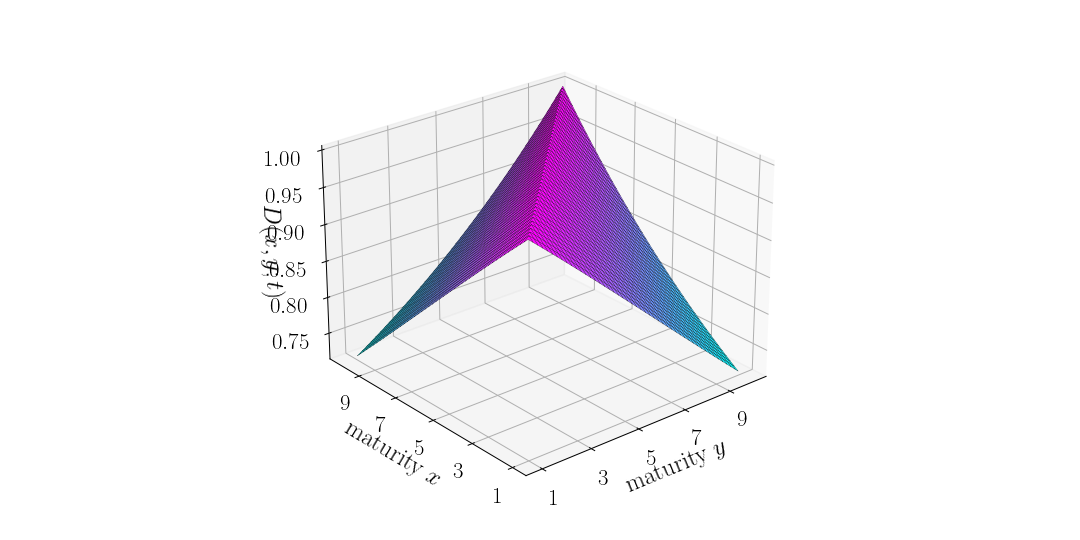

In [12]:
fig = plt.figure(figsize=(12,6))

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_normalized

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$',size=20)
ax.set_ylabel('maturity $x$',size=20)
ax.set_zlabel(r'$D(x,y;t)$',size=20)
#ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z,rstride=10, cstride=10, cmap=cm.cool, 
                       linewidth=0.1, edgecolors='k', lw=0.2)

# Adjust tick labels
ax.set_xticks(np.arange(min(x), max(x)+1, 2))  # Specify x-axis tick positions
ax.set_yticks(np.arange(min(y), max(y)+1, 2))  # Specify y-axis tick positions

#z_ticks = np.arange(np.min(z), np.max(z) + 1, 2)  # Specify z-axis tick positions
#ax.set_zticks(z_ticks)

ax.tick_params(axis='z', pad=10)  # Adjust the spacing between the z-axis and tick labels

plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

ax.view_init(25,230)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalized_PropagatorVisualization', dpi=400)    
plt.show()
plt.close(fig)

In [13]:
def D_TFR_norm(x,y,t,T_FR,mu):
    normalisation_factor = (mu*(math.cosh(mu*T_FR)+math.cosh(mu*(T_FR-2*(x-t))))/(2*math.sinh(mu*T_FR)))**(-1/2)*(mu*(math.cosh(mu*T_FR)+math.cosh(mu*(T_FR-2*(y-t))))/(2*math.sinh(mu*T_FR)))**(-1/2)
    return mu*(math.cosh(mu*(T_FR-abs(x-y)))+math.cosh(mu*(T_FR-(x+y-2*t))))/(2*math.sinh(mu*T_FR))*normalisation_factor

In [14]:
z_vals_TFR_norm = np.matrix([[D_TFR_norm(x_vals[i],y_vals[j],t,T_FR,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])

<IPython.core.display.Javascript object>


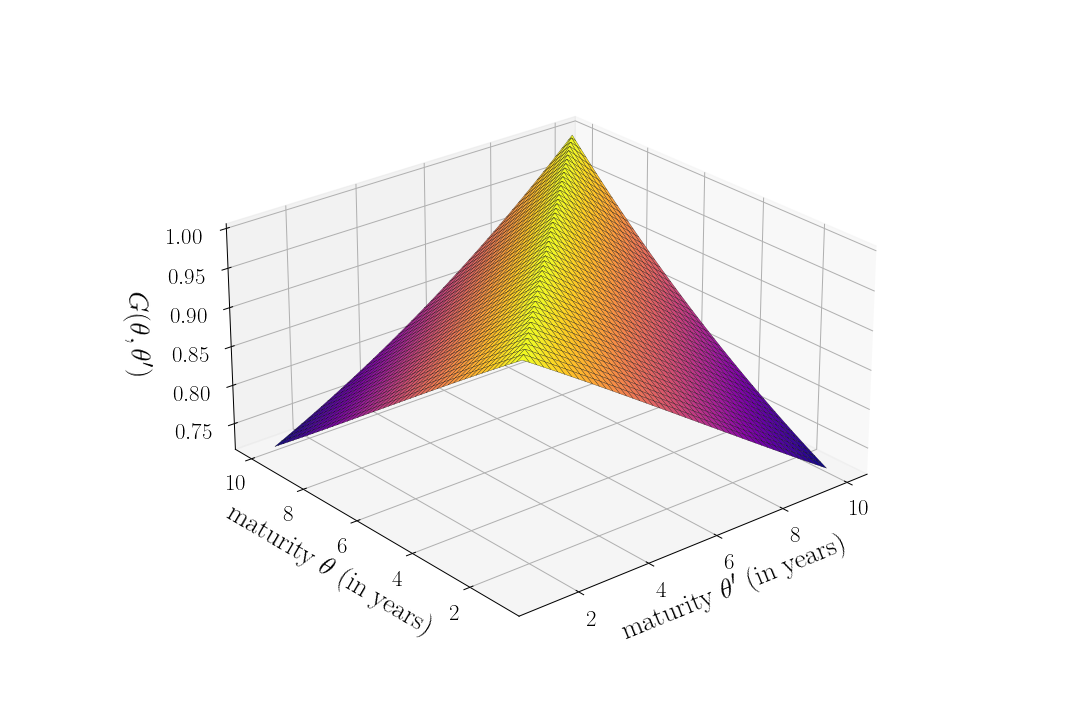

In [15]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_TFR_norm

X,Y=np.meshgrid(x,y)

ax.set_xlabel(r"maturity $\theta'$ (in years)", labelpad=10)
ax.set_ylabel(r'maturity $\theta$ (in years)', labelpad=10)
ax.set_zlabel(r"$G(\theta,\theta')$", labelpad=20)

surf = ax.plot_surface(X,Y,z,rstride=10, cstride=10, cmap="plasma", 
                       linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

ax.tick_params(axis='z', pad=10)  # Adjust the spacing between the z-axis and tick labels


ax.set_box_aspect([2, 2, 1.1])  # Adjust the aspect ratio to make the plot wider


ax.view_init(25,230)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalised_Propagator_T_FR_Visualization', dpi=400)  
plt.show()
plt.close(fig)

<IPython.core.display.Javascript object>


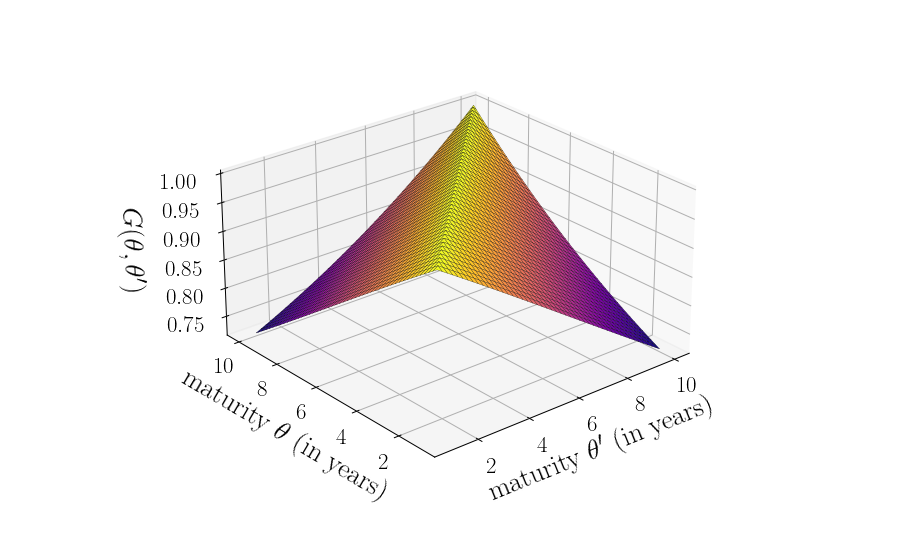

In [16]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_TFR_norm

X,Y=np.meshgrid(x,y)

ax.set_xlabel(r"maturity $\theta'$ (in years)", labelpad=10)
ax.set_ylabel(r'maturity $\theta$ (in years)', labelpad=10)
ax.set_zlabel(r"$G(\theta,\theta')$", labelpad=20)

surf = ax.plot_surface(X,Y,z, cmap="plasma", 
                       linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

ax.tick_params(axis='z', pad=10)  # Adjust the spacing between the z-axis and tick labels


ax.set_box_aspect([2,2,1.1])


ax.view_init(25,230)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalised_Propagator_T_FR_Visualization_no_aspect', dpi=400)  
plt.show()
plt.close(fig)

We succesfully normalized both propagators by including a "normalization factor" which we set equal to $\frac{1}{\sqrt{D(x,x;t)D(y,y;t)}}$ and $\frac{1}{\sqrt{D(x,x;t,T_FR)D(y,y;t,T_{FR})}}$ respectively.

We now aim to plot the price of a ZCB option in the HJM framework (i.e. $D(x,y;t)=1,\ \forall x,y\geq t$) and in the field theory framework.

In [15]:
#We first assume constant volatility
def vol(t,x):
    return 0.02

def vol_integrated_over_x(t, t_exp, T_mat):
    return integrate.quad(lambda x: vol(t,x), t_exp, T_mat)[0]

def q(t_0,t_exp,T_mat):
    return np.sqrt(integrate.quad(lambda t: vol_integrated_over_x(t,t_exp,T_mat)**2, t_0,t_exp)[0])

In [16]:
q(0,1,3)

0.039999999999999994

In [17]:
def d(t_0,t_exp,T_mat,K,F,sign):
    q_val = q(t_0,t_exp,T_mat)
    return 1/q_val*(np.log(F/K)+(-1)**sign*q_val**2/2)

In [18]:
#note that, for simplicity and testing, we picked approximate/plausible values for the discount factors P(t_0,t_*) and P(t_0,T)
#These values should be derived from a zero rate curve

def ZCB_call_price_HJM(t_0,t_exp,T_mat,K,F):
    return 0.7*(F*norm.cdf(d(t_0,t_exp,T_mat,K,F,0))-K*norm.cdf(d(t_0,t_exp,T_mat,K,F,1)))

In [19]:
ZCB_call_price(0,1,8,0.08,0.55/0.7)

NameError: name 'ZCB_call_price' is not defined

In [ ]:
t_0 = 0
t_exp = 2
T = np.arange(t_exp+1/365,t_exp+5,1/365)
K = 0.5
discountfactors = np.linspace(0,1,365*(t_exp+5))
F = discountfactors/0.7
price_HJM = [ZCB_call_price_HJM(t_0,t_exp,T[i],K,F[i]) for i in range(len(T))]

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(T,price_HJM)
plt.show()

In [108]:
def q_integrated_over_xy_field(t,t_exp,T_mat, mu):
    return integrate.dblquad(lambda x,y: vol(t,x)*D_norm(x,y,t,mu)*vol(t,y), t_exp,T_mat, t_0, T_mat)[0]

def q_field(t_0,t_exp,T_mat,mu):
    return np.sqrt(integrate.quad(lambda t: q_integrated_over_xy_field(t,t_exp,T_mat,mu), t_0,t_exp)[0])

In [109]:
q_field(0,1,3,0.04)

0.04851060158339395

In [116]:
def d_field(t_0,t_exp,T_mat,K,F,sign,mu):
    q_val = q_field(t_0,t_exp,T_mat,mu)
    return 1/q_val*(np.log(F/K)+(-1)**sign*q_val**2/2)

def ZCB_call_price_field(t_0,t_exp,T_mat,K,F,mu):
    return 0.7*(F*norm.cdf(d_field(t_0,t_exp,T_mat,K,F,0,mu))-K*norm.cdf(d_field(t_0,t_exp,T_mat,K,F,1,mu)))

In [124]:
ZCB_call_price_field(0,1,3,0.5,0.55/0.7,0.4)

0.20000000000000007

In [121]:
mu = 0.4

price_field = [ZCB_call_price_field(t_0,t_exp,T[i],K,F[i],mu) for i in range(len(T))]

D:\Programmas\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [118]:
fig =plt.figure(figsize=(10,5))
plt.plot(T,price_HJM)
plt.plot(T,price_field)
plt.legend(['HJM', 'Field'])
plt.show()

<IPython.core.display.Javascript object>

D:\Programmas\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 